In [2]:
import os
import pandas as pd

base_path = r'C:\Users\jeane\Desktop\Master\hyperparameters'
csv = pd.read_csv(os.path.join(base_path, 'pytorch_train.csv'))
hp = dict()
for arch in ['matrix-capsules', 'vector-capsules', 'cnn']:
    hp[arch] = csv[csv['model'] == arch]
    del hp[arch]['model']

csv = pd.read_csv(os.path.join(base_path, 'test.csv'))

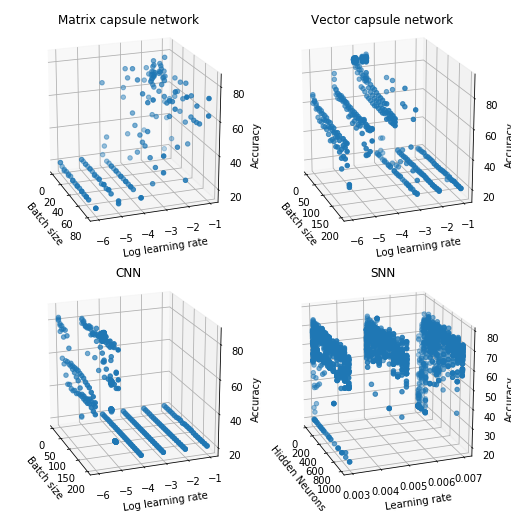

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig = plt.figure(figsize=(7.2,7.2))
i = 1
titles = {'matrix-capsules':'Matrix capsule network', 'vector-capsules':'Vector capsule network','cnn':'CNN'}
for arch in ['matrix-capsules', 'vector-capsules', 'cnn']:
    if arch == 'matrix-capsules':
        X = hp[arch][hp[arch]['epochs'].isin([5,10])]
    else:
        X = hp[arch]
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.scatter(X['batch_size'], np.log10(X['lr']), X['accuracy'])
    ax.set_xlabel('Batch size')
    ax.set_ylabel('Log learning rate')
    ax.set_zlabel('Accuracy')
    ax.view_init(elev=20, azim=-20)
    ax.set_title(titles[arch])
    i += 1
X = csv[csv['epochs'] == 5]
ax = fig.add_subplot(2, 2, i, projection='3d')
ax.scatter(X['n_hidden'], X['lr'], X['mean_accuracy'])
ax.set_ylabel('Learning rate')
ax.set_xlabel('Hidden Neurons')
ax.set_zlabel('Accuracy')
ax.view_init(elev=20., azim=-20)
ax.set_title('SNN')
fig.tight_layout()
plt.savefig('hyperparameters.pdf')

In [2]:
for arch in ['matrix-capsules', 'vector-capsules', 'cnn']:
    X = hp[arch]
    print(arch,X.sort_values(by='accuracy', ascending=False).head(3))
print('snn',csv.sort_values(by='mean_accuracy', ascending=False).head(4))

matrix-capsules                        dataset  viewpoint_modulo  batch_size  epochs     lr  \
1303  ._data_Dataset_lighting4                 1          21      10  0.030   
1300  ._data_Dataset_lighting4                 1          21      10  0.009   
1241  ._data_Dataset_lighting4                 1          19       8  0.010   

      weight_decay  seed  em_iters   accuracy  
1303             0     1         2  82.532936  
1300             0     1         2  81.183365  
1241             0     1         2  79.054840  
vector-capsules                        dataset  viewpoint_modulo  batch_size  epochs      lr  \
1198  ._data_Dataset_lighting4                 1           2      18  0.0003   
1183  ._data_Dataset_lighting4                 1           3      17  0.0003   
1192  ._data_Dataset_lighting4                 1           1      18  0.0002   

      weight_decay  seed  em_iters   accuracy  
1198             0     1         2  90.035240  
1183             0     1         2  88.844

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

for arch in ['matrix-capsules', 'vector-capsules', 'cnn']:
    print(arch)
    del hp[arch]['dataset']
    X = hp[arch].copy()
    y = X['accuracy']
    del X['accuracy']
    print(X.columns,mutual_info_regression(X, y))
print('snn')
X = csv.copy()
y = X['mean_accuracy']
del X['mean_accuracy']
del X['max_accuracy']
print(X.columns,mutual_info_regression(X, y))

matrix-capsules
Index(['viewpoint_modulo', 'batch_size', 'epochs', 'lr', 'weight_decay',
       'seed', 'em_iters'],
      dtype='object') [0.00745157 0.1551649  0.32925369 0.65849713 0.03577985 0.
 0.00333228]
vector-capsules
Index(['viewpoint_modulo', 'batch_size', 'epochs', 'lr', 'weight_decay',
       'seed', 'em_iters'],
      dtype='object') [0.0038453  0.48415687 0.50784399 0.73837616 0.         0.
 0.        ]
cnn
Index(['viewpoint_modulo', 'batch_size', 'epochs', 'lr', 'weight_decay',
       'seed', 'em_iters'],
      dtype='object') [0.         0.35351137 0.32339962 0.76635267 0.         0.01136491
 0.        ]
snn
Index(['seed', 'n_hidden', 'epochs', 'time', 'lr', 'lr_decay', 'decay_memory',
       'update_interval'],
      dtype='object') [0.         0.44436154 0.13140487 0.12045702 0.19491408 0.00151063
 0.05314478 0.22402496]


In [10]:
import os
import pandas as pd
import torch

base_path = '../Matrix-Capsules-EM-PyTorch/results/'
csv = pd.read_csv(os.path.join(base_path, 'ttest.csv'))
torch.save(csv.tail(50)['mean_accuracy'].values, os.path.join(base_path, 'snn_learning_curve3.pt'))